In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# since it's directly in My Drive, use this path
file_path = '/content/drive/My Drive/slice dataset.csv'

data = pd.read_csv(file_path)
print("✅ Data Loaded Successfully!")
print(data.shape)
data.head()



✅ Data Loaded Successfully!
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Basic info about the dataset
data.info()

# Check missing values
print("\nMissing values count:", data.isnull().sum().sum())

# Summary statistics
data.describe()

# Check class distribution (fraud vs non-fraud)
print("\nClass Distribution (%):")
print(data['Class'].value_counts(normalize=True) * 100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Step 2: Visual Insights (EDA with Charts)
📊 1. Fraud vs Non-Fraud Count

This helps us see how imbalanced the data is (fraud is rare).

/tmp/ipython-input-3967638332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=['#4CAF50','#F44336'])


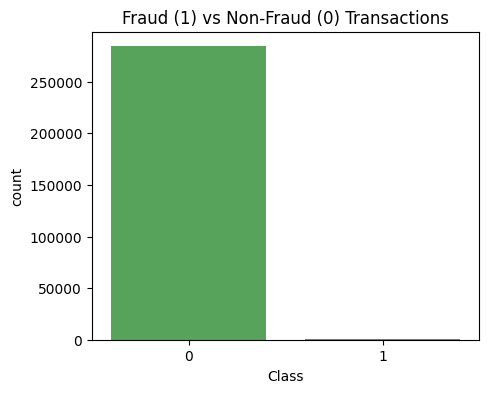

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Fraud vs Non-Fraud count
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=data, palette=['#4CAF50','#F44336'])
plt.title('Fraud (1) vs Non-Fraud (0) Transactions')
plt.show()


2. Distribution of Transaction Amounts

Compare how much money is spent in normal vs fraud transactions.

/tmp/ipython-input-739098262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette=['#4CAF50','#F44336'])


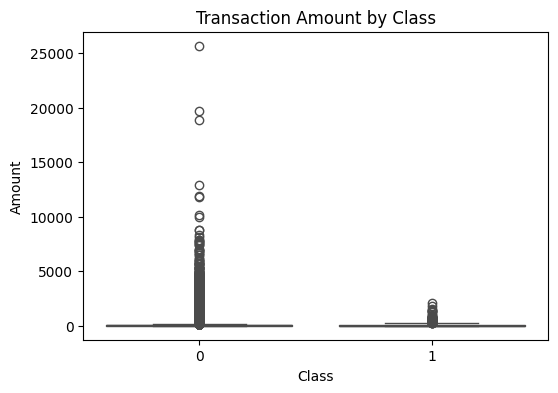

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=data, palette=['#4CAF50','#F44336'])
plt.title('Transaction Amount by Class')
plt.show()


3. Correlation Heatmap

To understand relationships between features — we’ll just look at the top correlated ones.

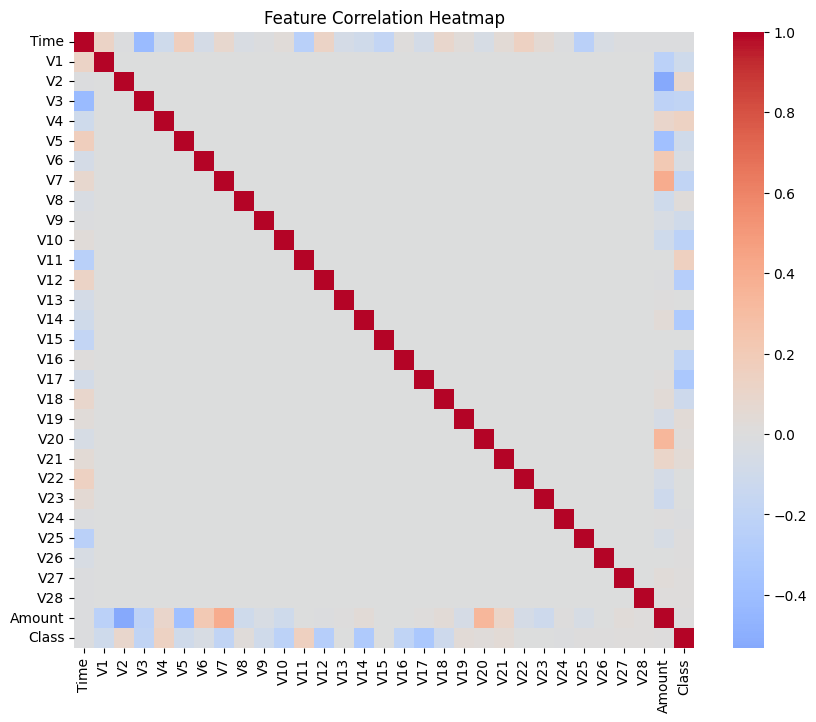

In [ ]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


 4.Fraud rate by time of day (Hour-based pattern)
\
This adds a time-based behavior view — super valuable for Slice-like analysis.

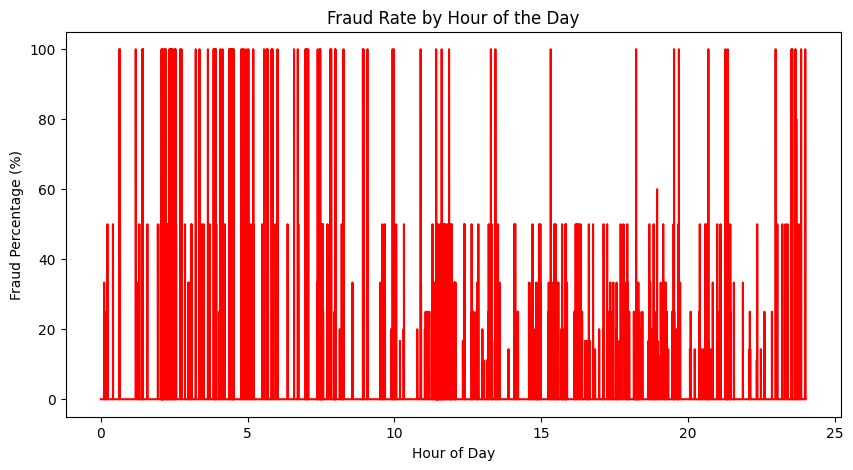

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Hour'] = (data['Time'] / 3600) % 24  # convert seconds to hours
fraud_by_hour = data.groupby('Hour')['Class'].mean() * 100

plt.figure(figsize=(10,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='red')
plt.title('Fraud Rate by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Percentage (%)')
plt.show()


 5. Average transaction per hour (Fraud vs All)







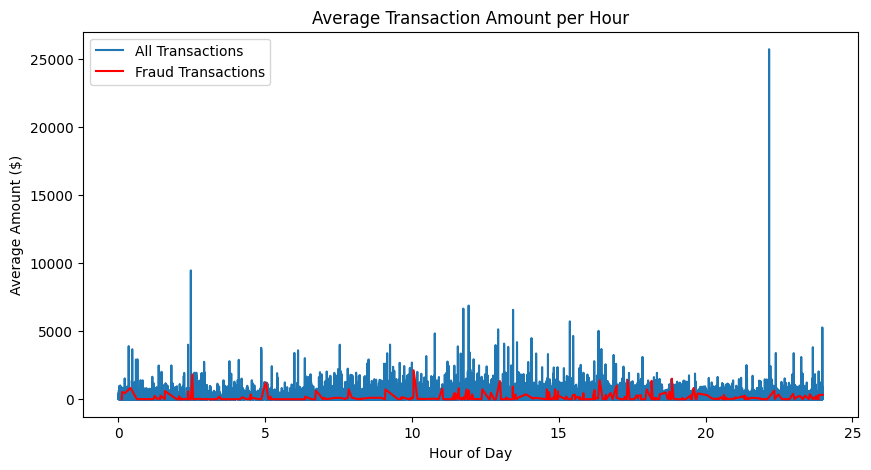

In [ ]:
transactions_per_hour = data.groupby('Hour')['Amount'].mean()
fraud_amount_per_hour = data[data['Class']==1].groupby('Hour')['Amount'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=transactions_per_hour.index, y=transactions_per_hour.values, label='All Transactions')
sns.lineplot(x=fraud_amount_per_hour.index, y=fraud_amount_per_hour.values, label='Fraud Transactions', color='red')
plt.title('Average Transaction Amount per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount ($)')
plt.legend()
plt.show()
